In [1]:
!pip install -U -q segmentation-models --user

from PIL import Image
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os

In [2]:
!pip freeze

absl-py==0.15.0
accelerate==0.5.1
access==1.1.3
affine==2.3.0
aiobotocore==2.1.1
aiohttp @ file:///home/conda/feedstock_root/build_artifacts/aiohttp_1637087016127/work
aioitertools==0.10.0
aiosignal @ file:///home/conda/feedstock_root/build_artifacts/aiosignal_1636093929600/work
albumentations==1.1.0
alembic==1.7.6
allennlp==2.9.0
altair==4.2.0
annoy==1.17.0
ansiwrap==0.8.4
anyio @ file:///home/conda/feedstock_root/build_artifacts/anyio_1637703203932/work/dist
apache-beam==2.34.0
aplus==0.11.0
appdirs @ file:///home/conda/feedstock_root/build_artifacts/appdirs_1603108395799/work
argcomplete @ file:///home/conda/feedstock_root/build_artifacts/argcomplete_1619128689661/work
argon2-cffi @ file:///home/conda/feedstock_root/build_artifacts/argon2-cffi_1636021379047/work
arrow @ file:///home/conda/feedstock_root/build_artifacts/arrow_1635261338479/work
arviz==0.11.4
asgiref==3.5.0
asn1crypto @ file:///home/conda/feedstock_root/build_artifacts/asn1crypto_1595949944546/work
astropy==4.3.1
astu

In [3]:
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
os.environ["SM_FRAMEWORK"] = "tf.keras"

import segmentation_models as sm
import matplotlib.pyplot as plt 
import tensorflow_io as tfio
import tensorflow as tf



exts = ('jpg', 'JPG', 'png', 'PNG', 'tif', 'gif', 'ppm')

Segmentation Models: using `tf.keras` framework.


In [4]:
print(tf. __version__) 
print(tfio. __version__)

2.6.2
0.21.0


# DRIVE

The dataset comes with pair of input retina image and target mask. Among all retina image, we will only use this dataset for a quick baseline. However, rest of the dataset can be replaces easily on this pipeline.


In [54]:
input_data = '/kaggle/input/dataset/new_data/new_data/train/image'
images = sorted(
    [
        os.path.join(input_data, fname)
        for fname in os.listdir(input_data)
        if fname.endswith(exts) and not fname.startswith(".")
    ]
)

images

['/kaggle/input/dataset/new_data/new_data/train/image/21_training_0.tif',
 '/kaggle/input/dataset/new_data/new_data/train/image/21_training_1.tif',
 '/kaggle/input/dataset/new_data/new_data/train/image/21_training_2.tif',
 '/kaggle/input/dataset/new_data/new_data/train/image/21_training_3.tif',
 '/kaggle/input/dataset/new_data/new_data/train/image/21_training_4.tif',
 '/kaggle/input/dataset/new_data/new_data/train/image/21_training_5.tif',
 '/kaggle/input/dataset/new_data/new_data/train/image/22_training_0.tif',
 '/kaggle/input/dataset/new_data/new_data/train/image/22_training_1.tif',
 '/kaggle/input/dataset/new_data/new_data/train/image/22_training_2.tif',
 '/kaggle/input/dataset/new_data/new_data/train/image/22_training_3.tif',
 '/kaggle/input/dataset/new_data/new_data/train/image/22_training_4.tif',
 '/kaggle/input/dataset/new_data/new_data/train/image/22_training_5.tif',
 '/kaggle/input/dataset/new_data/new_data/train/image/23_training_0.tif',
 '/kaggle/input/dataset/new_data/new_d

In [56]:
target_data = '/kaggle/input/dataset/new_data/new_data/train/mask'
masks = sorted(
    [
        os.path.join(target_data, fname)
        for fname in os.listdir(target_data)
        if fname.endswith(exts) and not fname.startswith(".")
    ]
)
masks

['/kaggle/input/dataset/new_data/new_data/train/mask/21_training_0.gif',
 '/kaggle/input/dataset/new_data/new_data/train/mask/21_training_1.gif',
 '/kaggle/input/dataset/new_data/new_data/train/mask/21_training_2.gif',
 '/kaggle/input/dataset/new_data/new_data/train/mask/21_training_3.gif',
 '/kaggle/input/dataset/new_data/new_data/train/mask/21_training_4.gif',
 '/kaggle/input/dataset/new_data/new_data/train/mask/21_training_5.gif',
 '/kaggle/input/dataset/new_data/new_data/train/mask/22_training_0.gif',
 '/kaggle/input/dataset/new_data/new_data/train/mask/22_training_1.gif',
 '/kaggle/input/dataset/new_data/new_data/train/mask/22_training_2.gif',
 '/kaggle/input/dataset/new_data/new_data/train/mask/22_training_3.gif',
 '/kaggle/input/dataset/new_data/new_data/train/mask/22_training_4.gif',
 '/kaggle/input/dataset/new_data/new_data/train/mask/22_training_5.gif',
 '/kaggle/input/dataset/new_data/new_data/train/mask/23_training_0.gif',
 '/kaggle/input/dataset/new_data/new_data/train/mas

In [57]:
print("Number of samples:", len(images), len(masks))
for input_path, target_path in zip(images[:10], masks[:10]):
    print(input_path[-31:], "|", target_path[-34:])

Number of samples: 120 120
a/train/image/21_training_0.tif | _data/train/mask/21_training_0.gif
a/train/image/21_training_1.tif | _data/train/mask/21_training_1.gif
a/train/image/21_training_2.tif | _data/train/mask/21_training_2.gif
a/train/image/21_training_3.tif | _data/train/mask/21_training_3.gif
a/train/image/21_training_4.tif | _data/train/mask/21_training_4.gif
a/train/image/21_training_5.tif | _data/train/mask/21_training_5.gif
a/train/image/22_training_0.tif | _data/train/mask/22_training_0.gif
a/train/image/22_training_1.tif | _data/train/mask/22_training_1.gif
a/train/image/22_training_2.tif | _data/train/mask/22_training_2.gif
a/train/image/22_training_3.tif | _data/train/mask/22_training_3.gif


In [58]:
from sklearn.model_selection import train_test_split
IMAGE_SIZE = 512
BATCH_SIZE = 12

def read_files(image_path, mask=False):
    image = tf.io.read_file(image_path)
    if mask:
        image = tf.io.decode_gif(image) # out: (1, h, w, 3)
        image = tf.squeeze(image) # out: (h, w, 3)
        image = tf.image.rgb_to_grayscale(image) # out: (h, w, 1)
        image = tf.divide(image, 128)
        image.set_shape([None, None, 1])
        image = tf.image.resize(images=image, size=[IMAGE_SIZE, IMAGE_SIZE])
        image = tf.cast(image, tf.int32)
    else:
        image = tfio.experimental.image.decode_tiff(image) # out: (h, w, 4)
        image = image[:,:,:3] # out: (h, w, 3)
        image.set_shape([None, None, 3])
        image = tf.image.resize(images=image, size=[IMAGE_SIZE, IMAGE_SIZE])
        image = image / 255.
    return image

def load_data(image_list, mask_list):
    image = read_files(image_list)
    mask  = read_files(mask_list, mask=True)
    return image, mask

def data_generator(image_list, mask_list):
    dataset = tf.data.Dataset.from_tensor_slices((image_list, mask_list))
    dataset = dataset.map(load_data, num_parallel_calls=tf.data.AUTOTUNE)
    dataset = dataset.batch(BATCH_SIZE, drop_remainder=False)
    return dataset
################################################3
train_x, valid_x, train_y, valid_y = train_test_split(images, masks, test_size=0.1, random_state=42)
train_dataset = data_generator(train_x, train_y)
train_dataset
validation_dataset = data_generator(valid_x, valid_y)
validation_dataset

<BatchDataset shapes: ((None, 512, 512, 3), (None, 512, 512, 1)), types: (tf.float32, tf.int32)>

In [59]:
def visualize(**images):
    """PLot images in one row."""
    n = len(images) 
    plt.figure(figsize=(20, 20))
    for i, (name, image) in enumerate(images.items()):
        plt.subplot(1, n, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.title(' '.join(name.split('_')).title())
        plt.imshow(image, cmap='gray')
    plt.show()

(12, 512, 512, 3) (12, 512, 512, 1)
0 1
[0 1]


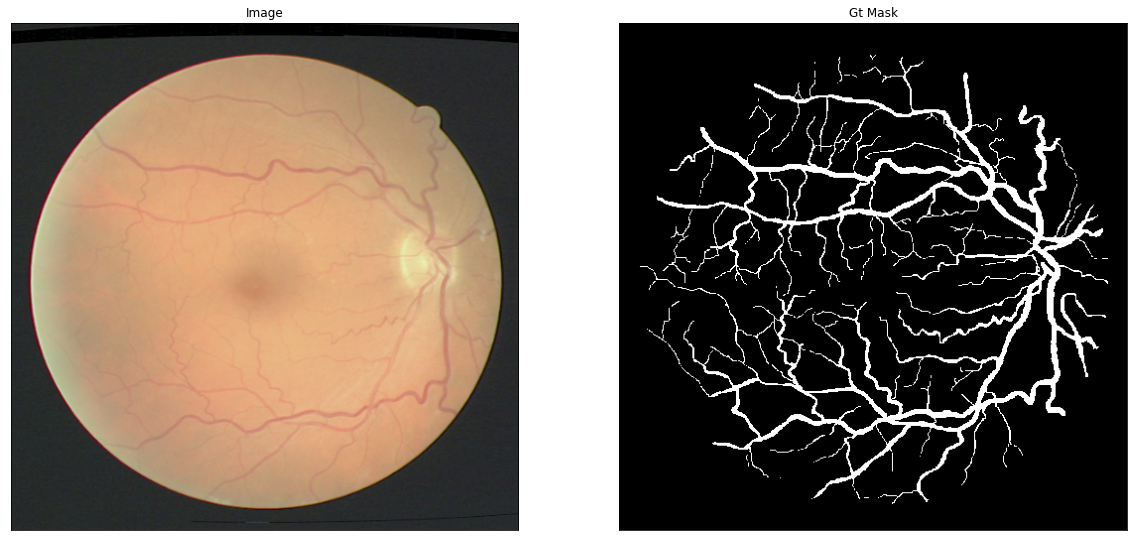

0 1
[0 1]


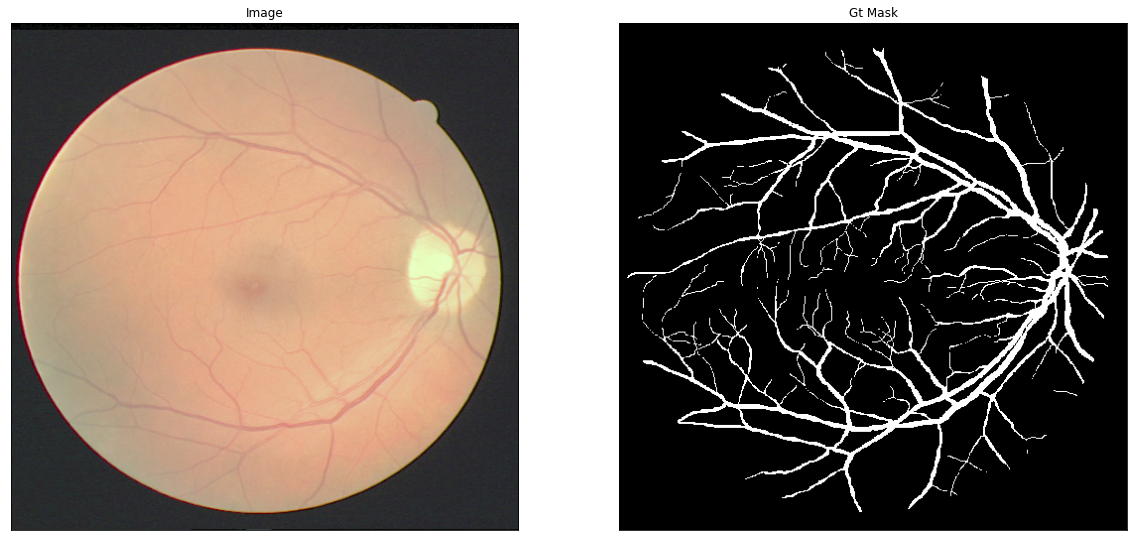

In [60]:
image, mask = next(iter(train_dataset.take(1))) 
print(image.shape, mask.shape)

for (img, msk) in zip(image[:2], mask[:2]):
    print(mask.numpy().min(), mask.numpy().max())
    print(np.unique(mask.numpy()))
    visualize(
        image=img.numpy(),
        gt_mask=msk.numpy(),
    )

# Model

In [93]:
from tensorflow import keras 

# Free up RAM in case the model definition cells were run multiple times
keras.backend.clear_session()
#improvement 1
BACKBONE   = 'vgg19'
n_classes  = 1 
activation = 'sigmoid' 
model4 = sm.Unet(BACKBONE, classes=n_classes, activation=activation)
model4.summary(line_length=110)

Model: "model"
______________________________________________________________________________________________________________
Layer (type)                        Output Shape            Param #      Connected to                         
input_1 (InputLayer)                [(None, None, None, 3)] 0                                                 
______________________________________________________________________________________________________________
block1_conv1 (Conv2D)               (None, None, None, 64)  1792         input_1[0][0]                        
______________________________________________________________________________________________________________
block1_conv2 (Conv2D)               (None, None, None, 64)  36928        block1_conv1[0][0]                   
______________________________________________________________________________________________________________
block1_pool (MaxPooling2D)          (None, None, None, 64)  0            block1_conv2[0][0]      

# Callback : Monitoring Training Progress

In [94]:
from tensorflow.keras.callbacks import Callback, EarlyStopping, ModelCheckpoint
class DisplayCallback(keras.callbacks.Callback):
    def __init__(self, dataset, epoch_interval=5):
        self.dataset = dataset
        self.epoch_interval = epoch_interval
    
    def display(self, display_list, extra_title=''):
        plt.figure(figsize=(15, 15))
        title = ['Input Image', 'True Mask', 'Predicted Mask']

        if len(display_list) > len(title):
            title.append(extra_title)

        for i in range(len(display_list)):
            plt.subplot(1, len(display_list), i+1)
            plt.title(title[i])
            plt.imshow(display_list[i], cmap='gray')
            plt.axis('off')
        plt.show()
        
    def create_mask(self, pred_mask):
        pred_mask = (pred_mask > 0.5).astype("int32")
        return pred_mask[0]
    
    def show_predictions(self, dataset, num=1):
        for image, mask in dataset.take(num):
            pred_mask = model4.predict(image)
            self.display([image[0], mask[0], self.create_mask(pred_mask)])
        
    def on_epoch_end(self, epoch, logs=None):
        if epoch and epoch % self.epoch_interval == 0:
            self.show_predictions(self.dataset)
            print ('\nSample Prediction after epoch {}\n'.format(epoch+1))

In [63]:
import os

# Define the directory to save the model
save_directory = '/kaggle/Models/'  # Change this to your desired directory

# Create the directory if it doesn't exist
os.makedirs(save_directory, exist_ok=True)




In [96]:
# Define a callback to save the best model weights
checkpoint_callback = ModelCheckpoint(
    os.path.join(save_directory, "model4.h5"), monitor="val_loss", save_best_only=True, save_weights_only=True, verbose=1
)

# Define a callback for early stopping
early_stopping_callback = EarlyStopping(monitor="val_loss", patience=10, verbose=1)

# Define your DisplayCallback with the dataset and interval
display_callback = DisplayCallback(dataset=validation_dataset, epoch_interval=5)

# Compile and Fit

Epoch 1/250
9/9 [==============================] - 9s 794ms/step - loss: 0.7200 - dice_coefficient: 0.1618 - accuracy: 0.6745 - val_loss: 0.9303 - val_dice_coefficient: 0.1384 - val_accuracy: 0.3049

Epoch 00001: val_loss improved from inf to 0.93028, saving model to /kaggle/Models/model4.h5
Epoch 2/250
9/9 [==============================] - 7s 750ms/step - loss: 0.6149 - dice_coefficient: 0.1879 - accuracy: 0.7861 - val_loss: 0.7586 - val_dice_coefficient: 0.1416 - val_accuracy: 0.4673

Epoch 00002: val_loss improved from 0.93028 to 0.75857, saving model to /kaggle/Models/model4.h5
Epoch 3/250
9/9 [==============================] - 7s 748ms/step - loss: 0.5576 - dice_coefficient: 0.2115 - accuracy: 0.8330 - val_loss: 0.6676 - val_dice_coefficient: 0.1520 - val_accuracy: 0.6062

Epoch 00003: val_loss improved from 0.75857 to 0.66756, saving model to /kaggle/Models/model4.h5
Epoch 4/250
9/9 [==============================] - 7s 750ms/step - loss: 0.5144 - dice_coefficient: 0.2321 - accu

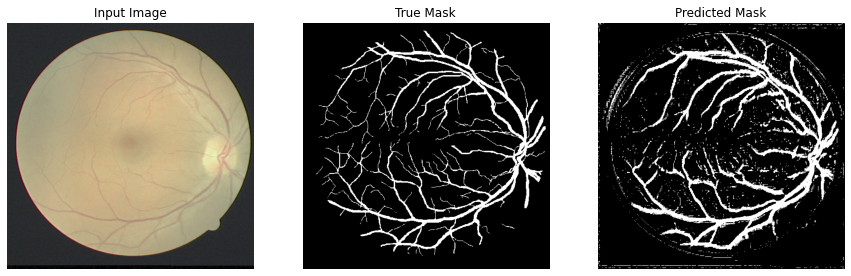


Sample Prediction after epoch 6

Epoch 7/250
9/9 [==============================] - 7s 750ms/step - loss: 0.4295 - dice_coefficient: 0.2714 - accuracy: 0.9228 - val_loss: 0.4716 - val_dice_coefficient: 0.2505 - val_accuracy: 0.8959

Epoch 00007: val_loss did not improve from 0.45307
Epoch 8/250
9/9 [==============================] - 7s 751ms/step - loss: 0.4088 - dice_coefficient: 0.2810 - accuracy: 0.9325 - val_loss: 0.4717 - val_dice_coefficient: 0.2520 - val_accuracy: 0.9021

Epoch 00008: val_loss did not improve from 0.45307
Epoch 9/250
9/9 [==============================] - 7s 748ms/step - loss: 0.3907 - dice_coefficient: 0.2896 - accuracy: 0.9395 - val_loss: 0.4664 - val_dice_coefficient: 0.2447 - val_accuracy: 0.9170

Epoch 00009: val_loss did not improve from 0.45307
Epoch 10/250
9/9 [==============================] - 7s 749ms/step - loss: 0.3754 - dice_coefficient: 0.2982 - accuracy: 0.9436 - val_loss: 0.4275 - val_dice_coefficient: 0.2541 - val_accuracy: 0.9397

Epoch 00010:

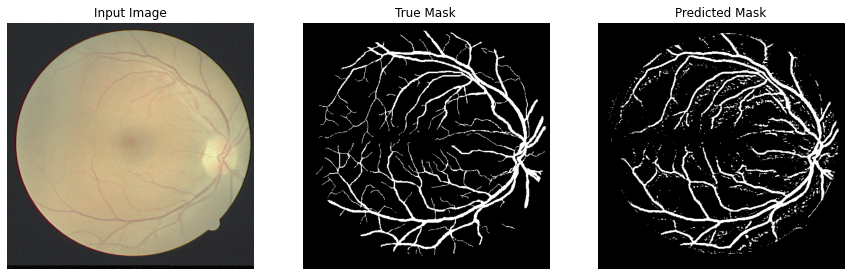


Sample Prediction after epoch 11

Epoch 12/250
9/9 [==============================] - 7s 751ms/step - loss: 0.3465 - dice_coefficient: 0.3150 - accuracy: 0.9502 - val_loss: 0.3966 - val_dice_coefficient: 0.2582 - val_accuracy: 0.9488

Epoch 00012: val_loss improved from 0.41732 to 0.39664, saving model to /kaggle/Models/model4.h5
Epoch 13/250
9/9 [==============================] - 7s 746ms/step - loss: 0.3334 - dice_coefficient: 0.3238 - accuracy: 0.9523 - val_loss: 0.3877 - val_dice_coefficient: 0.2588 - val_accuracy: 0.9500

Epoch 00013: val_loss improved from 0.39664 to 0.38770, saving model to /kaggle/Models/model4.h5
Epoch 14/250
9/9 [==============================] - 7s 749ms/step - loss: 0.3214 - dice_coefficient: 0.3318 - accuracy: 0.9540 - val_loss: 0.3707 - val_dice_coefficient: 0.2553 - val_accuracy: 0.9532

Epoch 00014: val_loss improved from 0.38770 to 0.37072, saving model to /kaggle/Models/model4.h5
Epoch 15/250
9/9 [==============================] - 7s 746ms/step - los

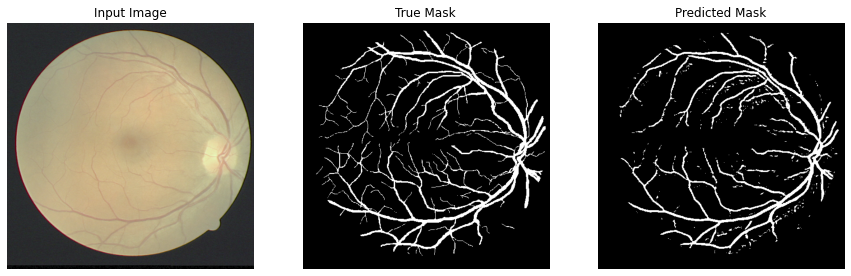


Sample Prediction after epoch 16

Epoch 17/250
9/9 [==============================] - 7s 750ms/step - loss: 0.2888 - dice_coefficient: 0.3552 - accuracy: 0.9574 - val_loss: 0.3387 - val_dice_coefficient: 0.2691 - val_accuracy: 0.9549

Epoch 00017: val_loss improved from 0.34852 to 0.33873, saving model to /kaggle/Models/model4.h5
Epoch 18/250
9/9 [==============================] - 7s 748ms/step - loss: 0.2791 - dice_coefficient: 0.3621 - accuracy: 0.9584 - val_loss: 0.3198 - val_dice_coefficient: 0.2750 - val_accuracy: 0.9565

Epoch 00018: val_loss improved from 0.33873 to 0.31977, saving model to /kaggle/Models/model4.h5
Epoch 19/250
9/9 [==============================] - 7s 750ms/step - loss: 0.2699 - dice_coefficient: 0.3695 - accuracy: 0.9592 - val_loss: 0.3065 - val_dice_coefficient: 0.2789 - val_accuracy: 0.9558

Epoch 00019: val_loss improved from 0.31977 to 0.30646, saving model to /kaggle/Models/model4.h5
Epoch 20/250
9/9 [==============================] - 7s 750ms/step - los

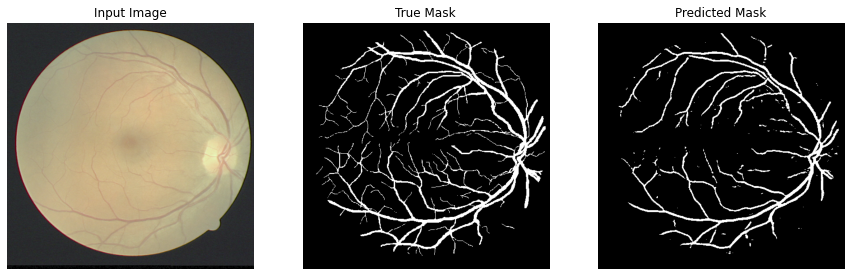


Sample Prediction after epoch 21

Epoch 22/250
9/9 [==============================] - 7s 750ms/step - loss: 0.2443 - dice_coefficient: 0.3915 - accuracy: 0.9615 - val_loss: 0.2770 - val_dice_coefficient: 0.2985 - val_accuracy: 0.9575

Epoch 00022: val_loss improved from 0.29109 to 0.27702, saving model to /kaggle/Models/model4.h5
Epoch 23/250
9/9 [==============================] - 7s 749ms/step - loss: 0.2367 - dice_coefficient: 0.3992 - accuracy: 0.9619 - val_loss: 0.2664 - val_dice_coefficient: 0.2894 - val_accuracy: 0.9536

Epoch 00023: val_loss improved from 0.27702 to 0.26643, saving model to /kaggle/Models/model4.h5
Epoch 24/250
9/9 [==============================] - 7s 753ms/step - loss: 0.2295 - dice_coefficient: 0.4066 - accuracy: 0.9625 - val_loss: 0.2622 - val_dice_coefficient: 0.2952 - val_accuracy: 0.9542

Epoch 00024: val_loss improved from 0.26643 to 0.26220, saving model to /kaggle/Models/model4.h5
Epoch 25/250
9/9 [==============================] - 7s 749ms/step - los

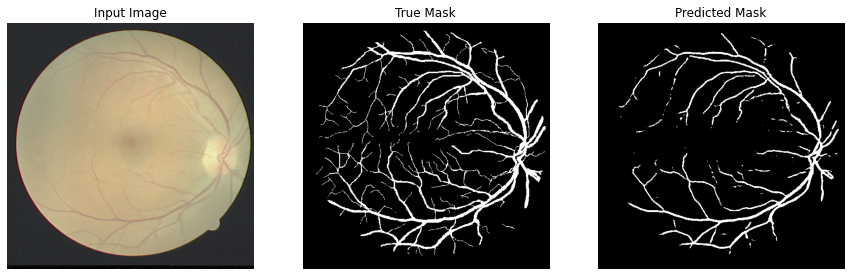


Sample Prediction after epoch 26

Epoch 27/250
9/9 [==============================] - 7s 750ms/step - loss: 0.2100 - dice_coefficient: 0.4279 - accuracy: 0.9640 - val_loss: 0.2439 - val_dice_coefficient: 0.3024 - val_accuracy: 0.9532

Epoch 00027: val_loss improved from 0.24477 to 0.24390, saving model to /kaggle/Models/model4.h5
Epoch 28/250
9/9 [==============================] - 7s 751ms/step - loss: 0.2039 - dice_coefficient: 0.4352 - accuracy: 0.9645 - val_loss: 0.2419 - val_dice_coefficient: 0.3057 - val_accuracy: 0.9534

Epoch 00028: val_loss improved from 0.24390 to 0.24193, saving model to /kaggle/Models/model4.h5
Epoch 29/250
9/9 [==============================] - 7s 749ms/step - loss: 0.1983 - dice_coefficient: 0.4430 - accuracy: 0.9649 - val_loss: 0.2280 - val_dice_coefficient: 0.3294 - val_accuracy: 0.9565

Epoch 00029: val_loss improved from 0.24193 to 0.22801, saving model to /kaggle/Models/model4.h5
Epoch 30/250
9/9 [==============================] - 7s 750ms/step - los

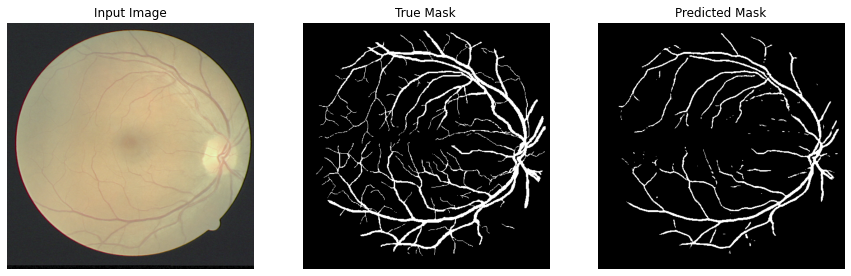


Sample Prediction after epoch 31

Epoch 32/250
9/9 [==============================] - 7s 756ms/step - loss: 0.1831 - dice_coefficient: 0.4627 - accuracy: 0.9660 - val_loss: 0.2117 - val_dice_coefficient: 0.3464 - val_accuracy: 0.9569

Epoch 00032: val_loss improved from 0.22037 to 0.21167, saving model to /kaggle/Models/model4.h5
Epoch 33/250
9/9 [==============================] - 7s 753ms/step - loss: 0.1789 - dice_coefficient: 0.4691 - accuracy: 0.9661 - val_loss: 0.2114 - val_dice_coefficient: 0.3444 - val_accuracy: 0.9567

Epoch 00033: val_loss improved from 0.21167 to 0.21141, saving model to /kaggle/Models/model4.h5
Epoch 34/250
9/9 [==============================] - 7s 749ms/step - loss: 0.1751 - dice_coefficient: 0.4751 - accuracy: 0.9660 - val_loss: 0.2092 - val_dice_coefficient: 0.3362 - val_accuracy: 0.9542

Epoch 00034: val_loss improved from 0.21141 to 0.20917, saving model to /kaggle/Models/model4.h5
Epoch 35/250
9/9 [==============================] - 7s 751ms/step - los

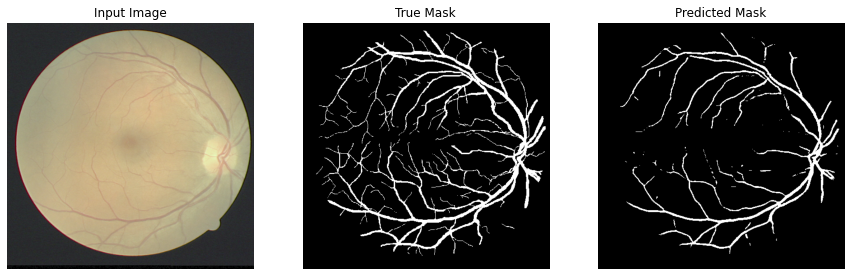


Sample Prediction after epoch 36

Epoch 37/250
9/9 [==============================] - 7s 749ms/step - loss: 0.1624 - dice_coefficient: 0.4956 - accuracy: 0.9674 - val_loss: 0.1900 - val_dice_coefficient: 0.3784 - val_accuracy: 0.9585

Epoch 00037: val_loss improved from 0.19419 to 0.19002, saving model to /kaggle/Models/model4.h5
Epoch 38/250
9/9 [==============================] - 7s 754ms/step - loss: 0.1587 - dice_coefficient: 0.5018 - accuracy: 0.9676 - val_loss: 0.1862 - val_dice_coefficient: 0.3799 - val_accuracy: 0.9577

Epoch 00038: val_loss improved from 0.19002 to 0.18622, saving model to /kaggle/Models/model4.h5
Epoch 39/250
9/9 [==============================] - 7s 750ms/step - loss: 0.1551 - dice_coefficient: 0.5082 - accuracy: 0.9680 - val_loss: 0.1810 - val_dice_coefficient: 0.3958 - val_accuracy: 0.9594

Epoch 00039: val_loss improved from 0.18622 to 0.18095, saving model to /kaggle/Models/model4.h5
Epoch 40/250
9/9 [==============================] - 7s 749ms/step - los

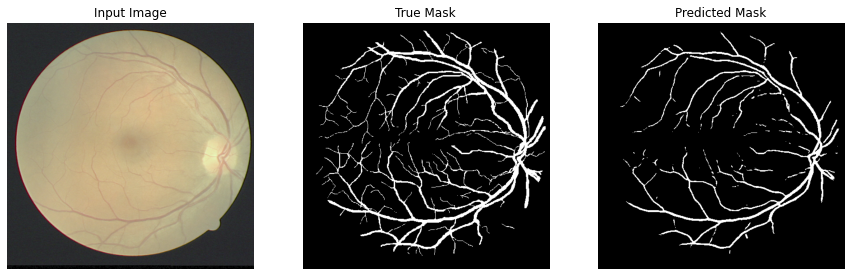


Sample Prediction after epoch 41

Epoch 42/250
9/9 [==============================] - 7s 750ms/step - loss: 0.1458 - dice_coefficient: 0.5258 - accuracy: 0.9687 - val_loss: 0.1714 - val_dice_coefficient: 0.4140 - val_accuracy: 0.9595

Epoch 00042: val_loss improved from 0.17918 to 0.17138, saving model to /kaggle/Models/model4.h5
Epoch 43/250
9/9 [==============================] - 7s 749ms/step - loss: 0.1428 - dice_coefficient: 0.5323 - accuracy: 0.9688 - val_loss: 0.1709 - val_dice_coefficient: 0.4084 - val_accuracy: 0.9580

Epoch 00043: val_loss improved from 0.17138 to 0.17090, saving model to /kaggle/Models/model4.h5
Epoch 44/250
9/9 [==============================] - 7s 749ms/step - loss: 0.1403 - dice_coefficient: 0.5376 - accuracy: 0.9689 - val_loss: 0.1654 - val_dice_coefficient: 0.4323 - val_accuracy: 0.9608

Epoch 00044: val_loss improved from 0.17090 to 0.16535, saving model to /kaggle/Models/model4.h5
Epoch 45/250
9/9 [==============================] - 7s 751ms/step - los

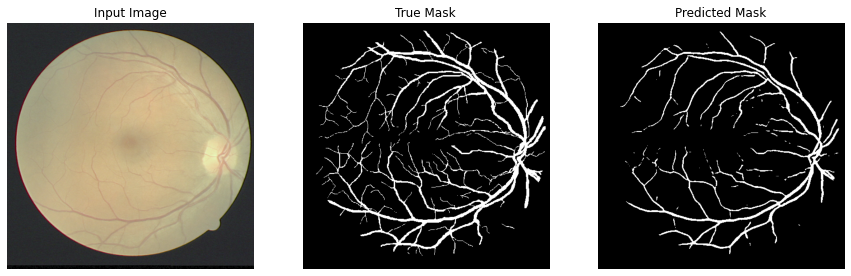


Sample Prediction after epoch 46

Epoch 47/250
9/9 [==============================] - 7s 750ms/step - loss: 0.1321 - dice_coefficient: 0.5534 - accuracy: 0.9700 - val_loss: 0.1577 - val_dice_coefficient: 0.4464 - val_accuracy: 0.9613

Epoch 00047: val_loss improved from 0.16167 to 0.15770, saving model to /kaggle/Models/model4.h5
Epoch 48/250
9/9 [==============================] - 7s 750ms/step - loss: 0.1293 - dice_coefficient: 0.5603 - accuracy: 0.9704 - val_loss: 0.1567 - val_dice_coefficient: 0.4507 - val_accuracy: 0.9610

Epoch 00048: val_loss improved from 0.15770 to 0.15666, saving model to /kaggle/Models/model4.h5
Epoch 49/250
9/9 [==============================] - 7s 749ms/step - loss: 0.1271 - dice_coefficient: 0.5656 - accuracy: 0.9705 - val_loss: 0.1551 - val_dice_coefficient: 0.4495 - val_accuracy: 0.9605

Epoch 00049: val_loss improved from 0.15666 to 0.15515, saving model to /kaggle/Models/model4.h5
Epoch 50/250
9/9 [==============================] - 7s 748ms/step - los

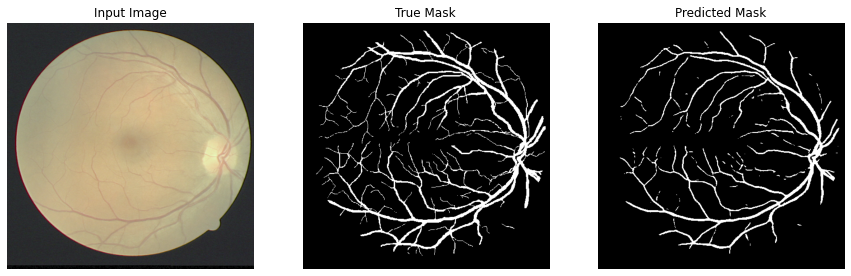


Sample Prediction after epoch 51

Epoch 52/250
9/9 [==============================] - 7s 749ms/step - loss: 0.1204 - dice_coefficient: 0.5808 - accuracy: 0.9716 - val_loss: 0.1484 - val_dice_coefficient: 0.4756 - val_accuracy: 0.9620

Epoch 00052: val_loss improved from 0.15230 to 0.14837, saving model to /kaggle/Models/model4.h5
Epoch 53/250
9/9 [==============================] - 7s 748ms/step - loss: 0.1189 - dice_coefficient: 0.5846 - accuracy: 0.9714 - val_loss: 0.1468 - val_dice_coefficient: 0.4776 - val_accuracy: 0.9614

Epoch 00053: val_loss improved from 0.14837 to 0.14680, saving model to /kaggle/Models/model4.h5
Epoch 54/250
9/9 [==============================] - 7s 751ms/step - loss: 0.1174 - dice_coefficient: 0.5885 - accuracy: 0.9714 - val_loss: 0.1462 - val_dice_coefficient: 0.4826 - val_accuracy: 0.9618

Epoch 00054: val_loss improved from 0.14680 to 0.14624, saving model to /kaggle/Models/model4.h5
Epoch 55/250
9/9 [==============================] - 7s 749ms/step - los

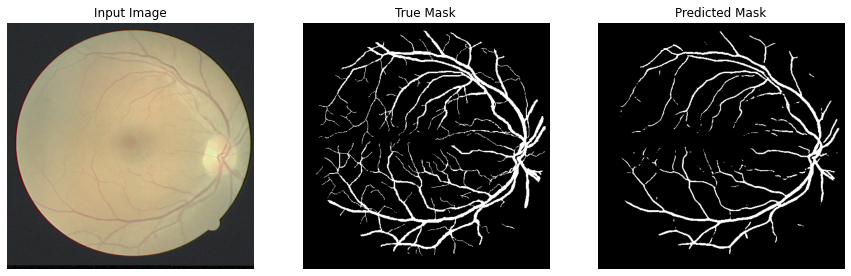


Sample Prediction after epoch 56

Epoch 57/250
9/9 [==============================] - 7s 751ms/step - loss: 0.1124 - dice_coefficient: 0.6007 - accuracy: 0.9718 - val_loss: 0.1387 - val_dice_coefficient: 0.5075 - val_accuracy: 0.9618

Epoch 00057: val_loss improved from 0.14060 to 0.13874, saving model to /kaggle/Models/model4.h5
Epoch 58/250
9/9 [==============================] - 7s 751ms/step - loss: 0.1108 - dice_coefficient: 0.6049 - accuracy: 0.9720 - val_loss: 0.1413 - val_dice_coefficient: 0.4999 - val_accuracy: 0.9605

Epoch 00058: val_loss did not improve from 0.13874
Epoch 59/250
9/9 [==============================] - 7s 749ms/step - loss: 0.1096 - dice_coefficient: 0.6091 - accuracy: 0.9719 - val_loss: 0.1366 - val_dice_coefficient: 0.5145 - val_accuracy: 0.9614

Epoch 00059: val_loss improved from 0.13874 to 0.13658, saving model to /kaggle/Models/model4.h5
Epoch 60/250
9/9 [==============================] - 7s 749ms/step - loss: 0.1081 - dice_coefficient: 0.6121 - accurac

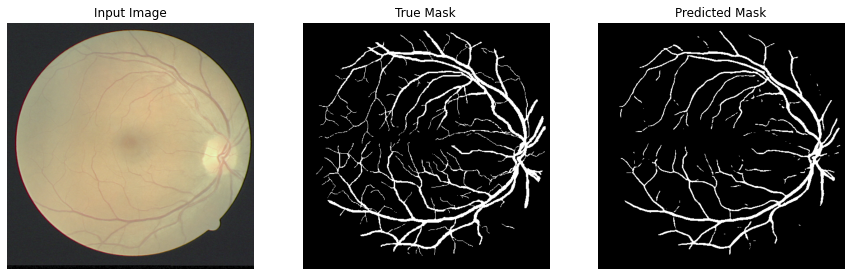


Sample Prediction after epoch 61

Epoch 62/250
9/9 [==============================] - 7s 751ms/step - loss: 0.1042 - dice_coefficient: 0.6226 - accuracy: 0.9731 - val_loss: 0.1309 - val_dice_coefficient: 0.5288 - val_accuracy: 0.9629

Epoch 00062: val_loss improved from 0.13298 to 0.13086, saving model to /kaggle/Models/model4.h5
Epoch 63/250
9/9 [==============================] - 7s 749ms/step - loss: 0.1023 - dice_coefficient: 0.6274 - accuracy: 0.9735 - val_loss: 0.1326 - val_dice_coefficient: 0.5199 - val_accuracy: 0.9617

Epoch 00063: val_loss did not improve from 0.13086
Epoch 64/250
9/9 [==============================] - 7s 750ms/step - loss: 0.1009 - dice_coefficient: 0.6315 - accuracy: 0.9738 - val_loss: 0.1305 - val_dice_coefficient: 0.5286 - val_accuracy: 0.9627

Epoch 00064: val_loss improved from 0.13086 to 0.13051, saving model to /kaggle/Models/model4.h5
Epoch 65/250
9/9 [==============================] - 7s 749ms/step - loss: 0.1004 - dice_coefficient: 0.6334 - accurac

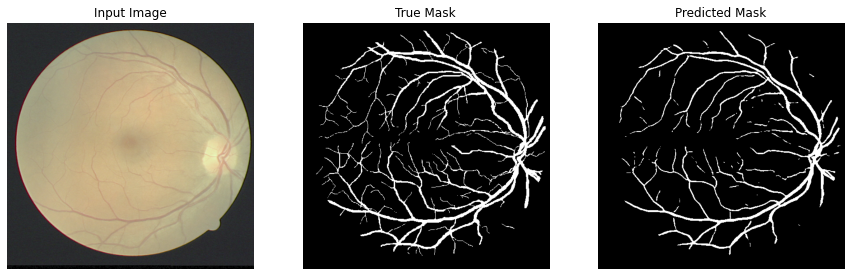


Sample Prediction after epoch 66

Epoch 67/250
9/9 [==============================] - 7s 749ms/step - loss: 0.0981 - dice_coefficient: 0.6401 - accuracy: 0.9737 - val_loss: 0.1254 - val_dice_coefficient: 0.5489 - val_accuracy: 0.9629

Epoch 00067: val_loss improved from 0.12678 to 0.12542, saving model to /kaggle/Models/model4.h5
Epoch 68/250
9/9 [==============================] - 7s 750ms/step - loss: 0.0969 - dice_coefficient: 0.6438 - accuracy: 0.9738 - val_loss: 0.1231 - val_dice_coefficient: 0.5597 - val_accuracy: 0.9637

Epoch 00068: val_loss improved from 0.12542 to 0.12305, saving model to /kaggle/Models/model4.h5
Epoch 69/250
9/9 [==============================] - 7s 752ms/step - loss: 0.0956 - dice_coefficient: 0.6469 - accuracy: 0.9741 - val_loss: 0.1227 - val_dice_coefficient: 0.5724 - val_accuracy: 0.9637

Epoch 00069: val_loss improved from 0.12305 to 0.12271, saving model to /kaggle/Models/model4.h5
Epoch 70/250
9/9 [==============================] - 7s 751ms/step - los

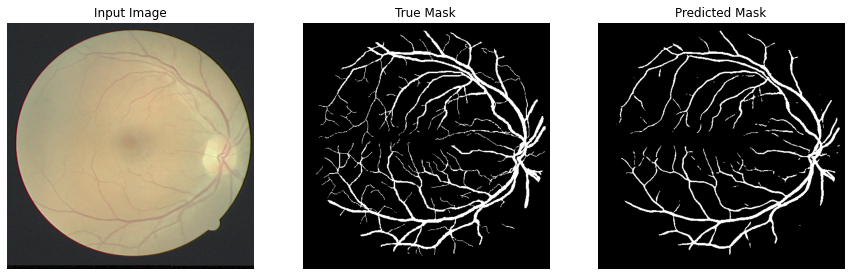


Sample Prediction after epoch 71

Epoch 72/250
9/9 [==============================] - 7s 749ms/step - loss: 0.0926 - dice_coefficient: 0.6570 - accuracy: 0.9743 - val_loss: 0.1226 - val_dice_coefficient: 0.5567 - val_accuracy: 0.9635

Epoch 00072: val_loss did not improve from 0.12067
Epoch 73/250
9/9 [==============================] - 7s 750ms/step - loss: 0.0913 - dice_coefficient: 0.6597 - accuracy: 0.9747 - val_loss: 0.1210 - val_dice_coefficient: 0.5717 - val_accuracy: 0.9635

Epoch 00073: val_loss did not improve from 0.12067
Epoch 74/250
9/9 [==============================] - 7s 753ms/step - loss: 0.0906 - dice_coefficient: 0.6614 - accuracy: 0.9746 - val_loss: 0.1196 - val_dice_coefficient: 0.5835 - val_accuracy: 0.9636

Epoch 00074: val_loss improved from 0.12067 to 0.11963, saving model to /kaggle/Models/model4.h5
Epoch 75/250
9/9 [==============================] - 7s 748ms/step - loss: 0.0905 - dice_coefficient: 0.6629 - accuracy: 0.9742 - val_loss: 0.1192 - val_dice_coeffi

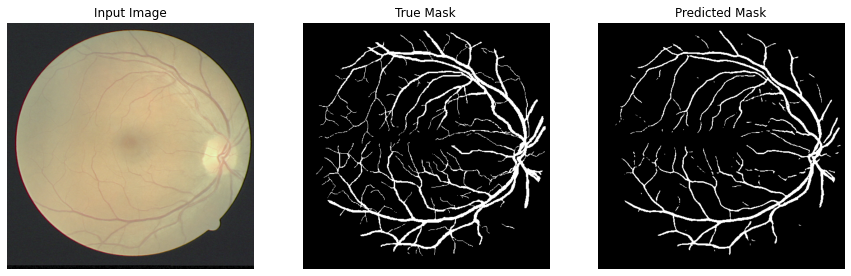


Sample Prediction after epoch 76

Epoch 77/250
9/9 [==============================] - 7s 749ms/step - loss: 0.0908 - dice_coefficient: 0.6643 - accuracy: 0.9733 - val_loss: 0.1218 - val_dice_coefficient: 0.5735 - val_accuracy: 0.9618

Epoch 00077: val_loss did not improve from 0.11921
Epoch 78/250
9/9 [==============================] - 7s 750ms/step - loss: 0.0907 - dice_coefficient: 0.6664 - accuracy: 0.9731 - val_loss: 0.1187 - val_dice_coefficient: 0.5878 - val_accuracy: 0.9629

Epoch 00078: val_loss improved from 0.11921 to 0.11873, saving model to /kaggle/Models/model4.h5
Epoch 79/250
9/9 [==============================] - 7s 757ms/step - loss: 0.0893 - dice_coefficient: 0.6694 - accuracy: 0.9735 - val_loss: 0.1151 - val_dice_coefficient: 0.5933 - val_accuracy: 0.9641

Epoch 00079: val_loss improved from 0.11873 to 0.11515, saving model to /kaggle/Models/model4.h5
Epoch 80/250
9/9 [==============================] - 7s 752ms/step - loss: 0.0866 - dice_coefficient: 0.6756 - accurac

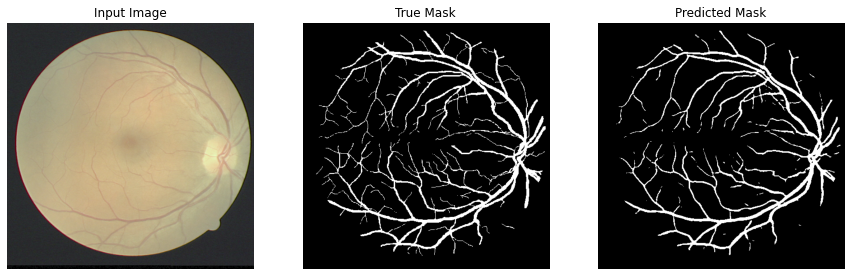


Sample Prediction after epoch 81

Epoch 82/250
9/9 [==============================] - 7s 753ms/step - loss: 0.0827 - dice_coefficient: 0.6858 - accuracy: 0.9762 - val_loss: 0.1152 - val_dice_coefficient: 0.6017 - val_accuracy: 0.9634

Epoch 00082: val_loss did not improve from 0.11327
Epoch 83/250
9/9 [==============================] - 7s 751ms/step - loss: 0.0823 - dice_coefficient: 0.6872 - accuracy: 0.9761 - val_loss: 0.1155 - val_dice_coefficient: 0.6014 - val_accuracy: 0.9634

Epoch 00083: val_loss did not improve from 0.11327
Epoch 84/250
9/9 [==============================] - 7s 750ms/step - loss: 0.0823 - dice_coefficient: 0.6882 - accuracy: 0.9756 - val_loss: 0.1137 - val_dice_coefficient: 0.6130 - val_accuracy: 0.9638

Epoch 00084: val_loss did not improve from 0.11327
Epoch 85/250
9/9 [==============================] - 7s 752ms/step - loss: 0.0823 - dice_coefficient: 0.6898 - accuracy: 0.9753 - val_loss: 0.1154 - val_dice_coefficient: 0.6095 - val_accuracy: 0.9638

Epoch 00

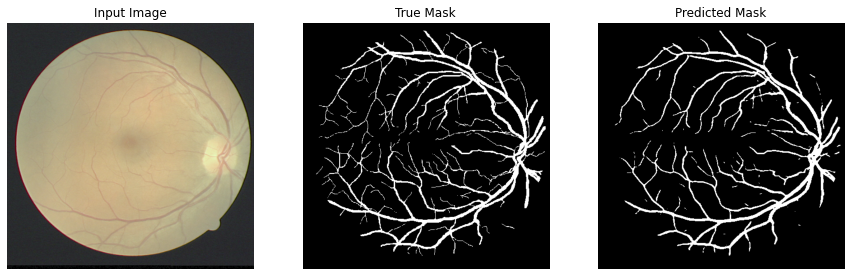


Sample Prediction after epoch 86

Epoch 87/250
9/9 [==============================] - 7s 750ms/step - loss: 0.0809 - dice_coefficient: 0.6939 - accuracy: 0.9757 - val_loss: 0.1126 - val_dice_coefficient: 0.6181 - val_accuracy: 0.9639

Epoch 00087: val_loss improved from 0.11309 to 0.11262, saving model to /kaggle/Models/model4.h5
Epoch 88/250
9/9 [==============================] - 7s 749ms/step - loss: 0.0803 - dice_coefficient: 0.6970 - accuracy: 0.9757 - val_loss: 0.1145 - val_dice_coefficient: 0.6015 - val_accuracy: 0.9633

Epoch 00088: val_loss did not improve from 0.11262
Epoch 89/250
9/9 [==============================] - 7s 750ms/step - loss: 0.0798 - dice_coefficient: 0.6978 - accuracy: 0.9756 - val_loss: 0.1123 - val_dice_coefficient: 0.6176 - val_accuracy: 0.9637

Epoch 00089: val_loss improved from 0.11262 to 0.11226, saving model to /kaggle/Models/model4.h5
Epoch 90/250
9/9 [==============================] - 7s 749ms/step - loss: 0.0791 - dice_coefficient: 0.6994 - accurac

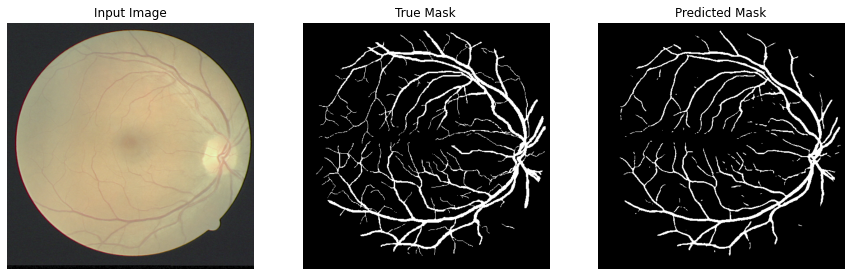


Sample Prediction after epoch 91

Epoch 92/250
9/9 [==============================] - 7s 750ms/step - loss: 0.0765 - dice_coefficient: 0.7070 - accuracy: 0.9767 - val_loss: 0.1098 - val_dice_coefficient: 0.6269 - val_accuracy: 0.9643

Epoch 00092: val_loss improved from 0.11056 to 0.10981, saving model to /kaggle/Models/model4.h5
Epoch 93/250
9/9 [==============================] - 7s 750ms/step - loss: 0.0750 - dice_coefficient: 0.7107 - accuracy: 0.9774 - val_loss: 0.1100 - val_dice_coefficient: 0.6229 - val_accuracy: 0.9640

Epoch 00093: val_loss did not improve from 0.10981
Epoch 94/250
9/9 [==============================] - 7s 748ms/step - loss: 0.0737 - dice_coefficient: 0.7150 - accuracy: 0.9779 - val_loss: 0.1098 - val_dice_coefficient: 0.6293 - val_accuracy: 0.9643

Epoch 00094: val_loss improved from 0.10981 to 0.10976, saving model to /kaggle/Models/model4.h5
Epoch 95/250
9/9 [==============================] - 7s 749ms/step - loss: 0.0729 - dice_coefficient: 0.7170 - accurac

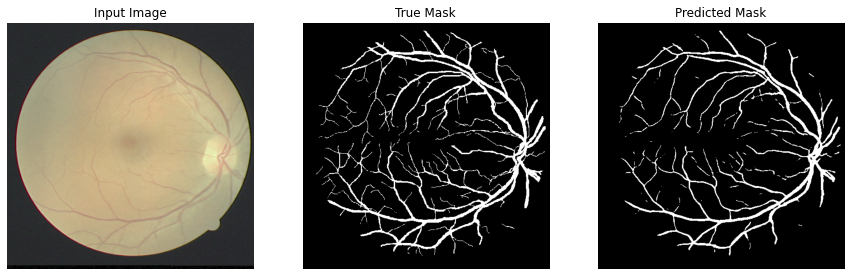


Sample Prediction after epoch 96

Epoch 97/250
9/9 [==============================] - 7s 749ms/step - loss: 0.0715 - dice_coefficient: 0.7224 - accuracy: 0.9783 - val_loss: 0.1114 - val_dice_coefficient: 0.6252 - val_accuracy: 0.9638

Epoch 00097: val_loss did not improve from 0.10920
Epoch 98/250
9/9 [==============================] - 7s 752ms/step - loss: 0.0711 - dice_coefficient: 0.7238 - accuracy: 0.9784 - val_loss: 0.1101 - val_dice_coefficient: 0.6288 - val_accuracy: 0.9639

Epoch 00098: val_loss did not improve from 0.10920
Epoch 99/250
9/9 [==============================] - 7s 753ms/step - loss: 0.0707 - dice_coefficient: 0.7253 - accuracy: 0.9784 - val_loss: 0.1092 - val_dice_coefficient: 0.6282 - val_accuracy: 0.9641

Epoch 00099: val_loss did not improve from 0.10920
Epoch 100/250
9/9 [==============================] - 7s 752ms/step - loss: 0.0701 - dice_coefficient: 0.7278 - accuracy: 0.9785 - val_loss: 0.1085 - val_dice_coefficient: 0.6337 - val_accuracy: 0.9642

Epoch 0

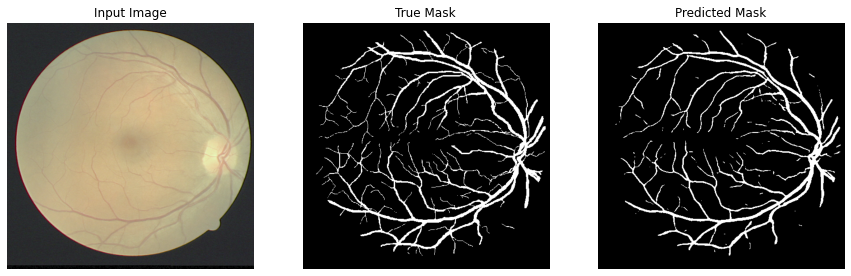


Sample Prediction after epoch 101

Epoch 102/250
9/9 [==============================] - 7s 751ms/step - loss: 0.0691 - dice_coefficient: 0.7312 - accuracy: 0.9786 - val_loss: 0.1086 - val_dice_coefficient: 0.6367 - val_accuracy: 0.9641

Epoch 00102: val_loss did not improve from 0.10823
Epoch 103/250
9/9 [==============================] - 7s 753ms/step - loss: 0.0688 - dice_coefficient: 0.7327 - accuracy: 0.9786 - val_loss: 0.1089 - val_dice_coefficient: 0.6393 - val_accuracy: 0.9642

Epoch 00103: val_loss did not improve from 0.10823
Epoch 104/250
9/9 [==============================] - 7s 750ms/step - loss: 0.0681 - dice_coefficient: 0.7349 - accuracy: 0.9787 - val_loss: 0.1099 - val_dice_coefficient: 0.6422 - val_accuracy: 0.9636

Epoch 00104: val_loss did not improve from 0.10823
Epoch 105/250
9/9 [==============================] - 7s 751ms/step - loss: 0.0678 - dice_coefficient: 0.7365 - accuracy: 0.9786 - val_loss: 0.1107 - val_dice_coefficient: 0.6370 - val_accuracy: 0.9632

Epo

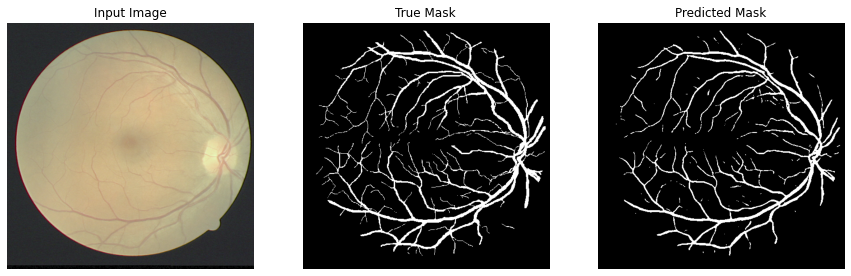


Sample Prediction after epoch 106

Epoch 107/250
9/9 [==============================] - 7s 748ms/step - loss: 0.0703 - dice_coefficient: 0.7330 - accuracy: 0.9769 - val_loss: 0.1079 - val_dice_coefficient: 0.6483 - val_accuracy: 0.9639

Epoch 00107: val_loss improved from 0.10823 to 0.10790, saving model to /kaggle/Models/model4.h5
Epoch 108/250
9/9 [==============================] - 7s 747ms/step - loss: 0.0703 - dice_coefficient: 0.7329 - accuracy: 0.9769 - val_loss: 0.1080 - val_dice_coefficient: 0.6435 - val_accuracy: 0.9640

Epoch 00108: val_loss did not improve from 0.10790
Epoch 109/250
9/9 [==============================] - 7s 754ms/step - loss: 0.0694 - dice_coefficient: 0.7356 - accuracy: 0.9772 - val_loss: 0.1084 - val_dice_coefficient: 0.6497 - val_accuracy: 0.9637

Epoch 00109: val_loss did not improve from 0.10790
Epoch 110/250
9/9 [==============================] - 7s 751ms/step - loss: 0.0683 - dice_coefficient: 0.7384 - accuracy: 0.9777 - val_loss: 0.1094 - val_dice_c

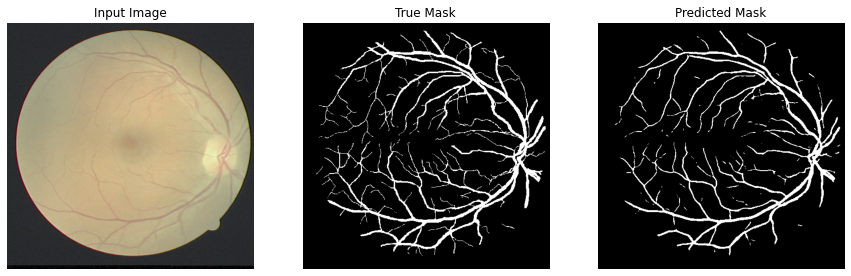


Sample Prediction after epoch 111

Epoch 112/250
9/9 [==============================] - 7s 751ms/step - loss: 0.0650 - dice_coefficient: 0.7465 - accuracy: 0.9792 - val_loss: 0.1077 - val_dice_coefficient: 0.6511 - val_accuracy: 0.9637

Epoch 00112: val_loss improved from 0.10790 to 0.10767, saving model to /kaggle/Models/model4.h5
Epoch 113/250
9/9 [==============================] - 7s 750ms/step - loss: 0.0633 - dice_coefficient: 0.7506 - accuracy: 0.9800 - val_loss: 0.1048 - val_dice_coefficient: 0.6593 - val_accuracy: 0.9644

Epoch 00113: val_loss improved from 0.10767 to 0.10485, saving model to /kaggle/Models/model4.h5
Epoch 114/250
9/9 [==============================] - 7s 751ms/step - loss: 0.0620 - dice_coefficient: 0.7543 - accuracy: 0.9806 - val_loss: 0.1059 - val_dice_coefficient: 0.6543 - val_accuracy: 0.9639

Epoch 00114: val_loss did not improve from 0.10485
Epoch 115/250
9/9 [==============================] - 7s 749ms/step - loss: 0.0616 - dice_coefficient: 0.7566 - ac

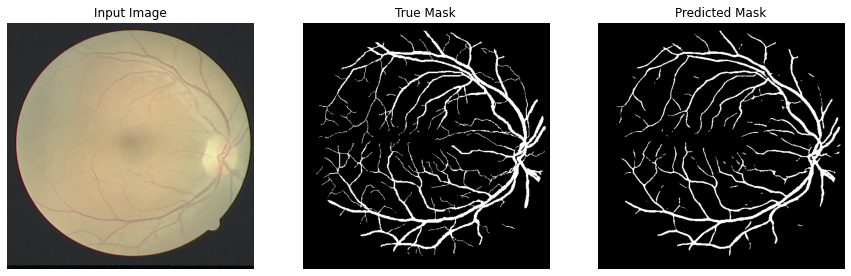


Sample Prediction after epoch 116

Epoch 117/250
9/9 [==============================] - 7s 750ms/step - loss: 0.0615 - dice_coefficient: 0.7577 - accuracy: 0.9803 - val_loss: 0.1073 - val_dice_coefficient: 0.6605 - val_accuracy: 0.9640

Epoch 00117: val_loss did not improve from 0.10485
Epoch 118/250
9/9 [==============================] - 7s 750ms/step - loss: 0.0613 - dice_coefficient: 0.7592 - accuracy: 0.9802 - val_loss: 0.1069 - val_dice_coefficient: 0.6602 - val_accuracy: 0.9640

Epoch 00118: val_loss did not improve from 0.10485
Epoch 119/250
9/9 [==============================] - 7s 751ms/step - loss: 0.0611 - dice_coefficient: 0.7597 - accuracy: 0.9801 - val_loss: 0.1056 - val_dice_coefficient: 0.6658 - val_accuracy: 0.9645

Epoch 00119: val_loss did not improve from 0.10485
Epoch 120/250
9/9 [==============================] - 7s 751ms/step - loss: 0.0607 - dice_coefficient: 0.7621 - accuracy: 0.9802 - val_loss: 0.1075 - val_dice_coefficient: 0.6575 - val_accuracy: 0.9637

Epo

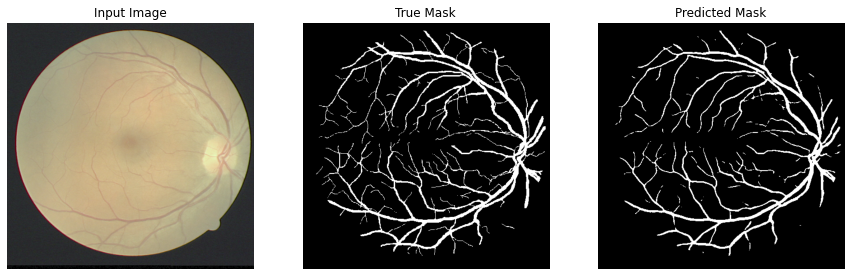


Sample Prediction after epoch 121

Epoch 122/250
9/9 [==============================] - 7s 749ms/step - loss: 0.0603 - dice_coefficient: 0.7634 - accuracy: 0.9802 - val_loss: 0.1064 - val_dice_coefficient: 0.6720 - val_accuracy: 0.9646

Epoch 00122: val_loss did not improve from 0.10485
Epoch 123/250
9/9 [==============================] - 7s 748ms/step - loss: 0.0593 - dice_coefficient: 0.7668 - accuracy: 0.9806 - val_loss: 0.1066 - val_dice_coefficient: 0.6611 - val_accuracy: 0.9637

Epoch 00123: val_loss did not improve from 0.10485
Epoch 00123: early stopping


In [97]:
from tensorflow.keras.metrics import MeanIoU

# Define a function to calculate the Dice coefficient
def dice_coefficient(y_true, y_pred):
    intersection = tf.reduce_sum(y_true * y_pred)
    union = tf.reduce_sum(y_true) + tf.reduce_sum(y_pred)
    return (2.0 * intersection + 1e-5) / (union + 1e-5)


# define optomizer
optim = keras.optimizers.Adam(0.0001)
bce   = keras.losses.BinaryCrossentropy()
metrics = [dice_coefficient, "accuracy"]

# compile keras model with defined optimozer, loss and metrics
model4.compile(optim, bce, metrics)



history = model4.fit(
    train_dataset,
    epochs=250,
    validation_data=validation_dataset,
    callbacks=[checkpoint_callback, early_stopping_callback, display_callback]
)

In [98]:
test_data = '/kaggle/input/dataset/new_data/new_data/test/image'
test_images = sorted(
    [
        os.path.join(test_data, fname)
        for fname in os.listdir(test_data)
        if fname.endswith(exts) and not fname.startswith(".")
    ]
)

test_images

['/kaggle/input/dataset/new_data/new_data/test/image/01_test.tif',
 '/kaggle/input/dataset/new_data/new_data/test/image/02_test.tif',
 '/kaggle/input/dataset/new_data/new_data/test/image/03_test.tif',
 '/kaggle/input/dataset/new_data/new_data/test/image/04_test.tif',
 '/kaggle/input/dataset/new_data/new_data/test/image/05_test.tif',
 '/kaggle/input/dataset/new_data/new_data/test/image/06_test.tif',
 '/kaggle/input/dataset/new_data/new_data/test/image/07_test.tif',
 '/kaggle/input/dataset/new_data/new_data/test/image/08_test.tif',
 '/kaggle/input/dataset/new_data/new_data/test/image/09_test.tif',
 '/kaggle/input/dataset/new_data/new_data/test/image/10_test.tif',
 '/kaggle/input/dataset/new_data/new_data/test/image/11_test.tif',
 '/kaggle/input/dataset/new_data/new_data/test/image/12_test.tif',
 '/kaggle/input/dataset/new_data/new_data/test/image/13_test.tif',
 '/kaggle/input/dataset/new_data/new_data/test/image/14_test.tif',
 '/kaggle/input/dataset/new_data/new_data/test/image/15_test.t

In [99]:
test_mask = '/kaggle/input/dataset/new_data/new_data/test/mask'
test_masks = sorted(
    [
        os.path.join(test_mask, fname)
        for fname in os.listdir(test_mask)
        if fname.endswith(exts) and not fname.startswith(".")
    ]
)
test_masks

['/kaggle/input/dataset/new_data/new_data/test/mask/01_test.gif',
 '/kaggle/input/dataset/new_data/new_data/test/mask/02_test.gif',
 '/kaggle/input/dataset/new_data/new_data/test/mask/03_test.gif',
 '/kaggle/input/dataset/new_data/new_data/test/mask/04_test.gif',
 '/kaggle/input/dataset/new_data/new_data/test/mask/05_test.gif',
 '/kaggle/input/dataset/new_data/new_data/test/mask/06_test.gif',
 '/kaggle/input/dataset/new_data/new_data/test/mask/07_test.gif',
 '/kaggle/input/dataset/new_data/new_data/test/mask/08_test.gif',
 '/kaggle/input/dataset/new_data/new_data/test/mask/09_test.gif',
 '/kaggle/input/dataset/new_data/new_data/test/mask/10_test.gif',
 '/kaggle/input/dataset/new_data/new_data/test/mask/11_test.gif',
 '/kaggle/input/dataset/new_data/new_data/test/mask/12_test.gif',
 '/kaggle/input/dataset/new_data/new_data/test/mask/13_test.gif',
 '/kaggle/input/dataset/new_data/new_data/test/mask/14_test.gif',
 '/kaggle/input/dataset/new_data/new_data/test/mask/15_test.gif',
 '/kaggle/

In [100]:
print("Number of samples:", len(test_images), len(test_masks))
for test_path, mask_path in zip(test_images[:10], test_masks[:10]):
    print(test_path[-31:], "|", mask_path[-34:])

Number of samples: 20 20
new_data/test/image/01_test.tif | ata/new_data/test/mask/01_test.gif
new_data/test/image/02_test.tif | ata/new_data/test/mask/02_test.gif
new_data/test/image/03_test.tif | ata/new_data/test/mask/03_test.gif
new_data/test/image/04_test.tif | ata/new_data/test/mask/04_test.gif
new_data/test/image/05_test.tif | ata/new_data/test/mask/05_test.gif
new_data/test/image/06_test.tif | ata/new_data/test/mask/06_test.gif
new_data/test/image/07_test.tif | ata/new_data/test/mask/07_test.gif
new_data/test/image/08_test.tif | ata/new_data/test/mask/08_test.gif
new_data/test/image/09_test.tif | ata/new_data/test/mask/09_test.gif
new_data/test/image/10_test.tif | ata/new_data/test/mask/10_test.gif


In [101]:
IMAGE_SIZE = 512
BATCH_SIZE = 12

def read_files(image_path, mask=False):
    image = tf.io.read_file(image_path)
    if mask:
        image = tf.io.decode_gif(image) # out: (1, h, w, 3)
        image = tf.squeeze(image) # out: (h, w, 3)
        image = tf.image.rgb_to_grayscale(image) # out: (h, w, 1)
        image = tf.divide(image, 128)
        image.set_shape([None, None, 1])
        image = tf.image.resize(images=image, size=[IMAGE_SIZE, IMAGE_SIZE])
        image = tf.cast(image, tf.int32)
    else:
        image = tfio.experimental.image.decode_tiff(image) # out: (h, w, 4)
        image = image[:,:,:3] # out: (h, w, 3)
        image.set_shape([None, None, 3])
        image = tf.image.resize(images=image, size=[IMAGE_SIZE, IMAGE_SIZE])
        image = image / 255.
    return image

def load_data(image_list, mask_list):
    image = read_files(image_list)
    mask  = read_files(mask_list, mask=True)
    return image, mask

def data_generator(image_list, mask_list):
    dataset = tf.data.Dataset.from_tensor_slices((image_list, mask_list))
    dataset = dataset.map(load_data, num_parallel_calls=tf.data.AUTOTUNE)
    dataset = dataset.batch(BATCH_SIZE, drop_remainder=False)
    return dataset

test_dataset = data_generator(test_images, test_masks)
test_dataset

<BatchDataset shapes: ((None, 512, 512, 3), (None, 512, 512, 1)), types: (tf.float32, tf.int32)>

In [102]:
valid_dataset = test_dataset

In [103]:
test_masks = np.concatenate([y for x, y in valid_dataset], axis=0)
masks = test_masks.ravel()

In [104]:
test_imgs = np.concatenate([x for x, y in valid_dataset], axis=0)
predictions = model4.predict(test_imgs)
predictions.shape

(20, 512, 512, 1)

In [105]:
y_pred = predictions.ravel()
y_pred = (y_pred > 0.5).astype('int32')
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [106]:
from sklearn.metrics import classification_report
print(classification_report(masks, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98   4784655
           1       0.83      0.73      0.78    458225

    accuracy                           0.96   5242880
   macro avg       0.90      0.86      0.88   5242880
weighted avg       0.96      0.96      0.96   5242880



In [107]:
def jaccard(target, prediction):
    intersection = np.logical_and(target, prediction)
    union = np.logical_or(target, prediction)
    iou_score = np.sum(intersection) / np.sum(union)
    return iou_score
print('The Jaccard Score is: ', jaccard(y_pred, masks))


The Jaccard Score is:  0.6363175421307353


In [108]:
def my_dice(target, prediction):
 intersection = np.logical_and(target, prediction)
 union = np.logical_or(target, prediction)
 dice = (2*np.sum(intersection))/(np.sum(union)+np.sum(intersection))
 return dice
print('The Dice Score is: ', my_dice(y_pred, masks))

The Dice Score is:  0.7777433483994222


In [109]:
from sklearn.metrics import matthews_corrcoef

mcc = matthews_corrcoef(masks, y_pred)
print('The MCC Score is:', mcc)


The MCC Score is: 0.7600837792526597


In [110]:
from sklearn.metrics import roc_auc_score, roc_curve

# Assuming 'masks' and 'y_pred' are the true labels and predicted probabilities for the positive class.
fpr, tpr, thresholds = roc_curve(masks, y_pred)
auc = roc_auc_score(masks, y_pred)

print('The AUC Score is:', auc)


The AUC Score is: 0.8573186291845469


(-0.5, 511.5, 511.5, -0.5)

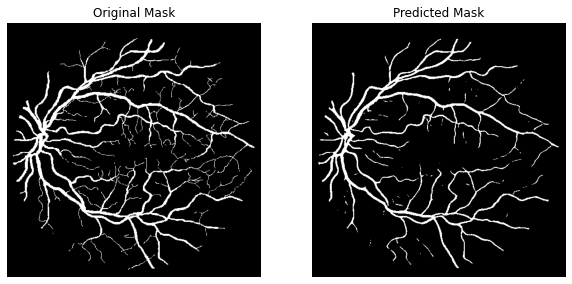

In [111]:
image = test_imgs[4]
mask = test_masks[4]
image = np.expand_dims(image, axis=0)
pred_mask = model4.predict(image)
pred_mask = (pred_mask > 0.5).astype('int32')
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.title('Original Mask')
plt.imshow(mask, cmap='gray')
plt.axis('off')
plt.subplot(122)
plt.title('Predicted Mask')
plt.imshow(pred_mask[0], cmap='gray')
plt.axis('off')

(-0.5, 511.5, 511.5, -0.5)

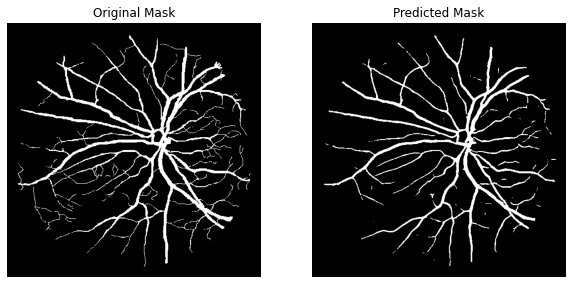

In [112]:
image = test_imgs[3]
mask = test_masks[3]
image = np.expand_dims(image, axis=0)
pred_mask = model4.predict(image)
pred_mask = (pred_mask > 0.5).astype('int32')
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.title('Original Mask')
plt.imshow(mask, cmap='gray')
plt.axis('off')
plt.subplot(122)
plt.title('Predicted Mask')
plt.imshow(pred_mask[0], cmap='gray')
plt.axis('off')

(-0.5, 511.5, 511.5, -0.5)

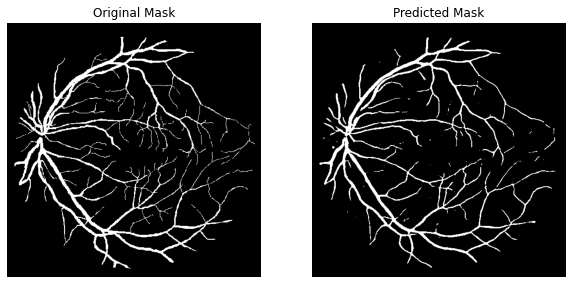

In [113]:
image = test_imgs[11]
mask = test_masks[11]
image = np.expand_dims(image, axis=0)
pred_mask = model4.predict(image)
pred_mask = (pred_mask > 0.5).astype('int32')
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.title('Original Mask')
plt.imshow(mask, cmap='gray')
plt.axis('off')
plt.subplot(122)
plt.title('Predicted Mask')
plt.imshow(pred_mask[0], cmap='gray')
plt.axis('off')

(-0.5, 511.5, 511.5, -0.5)

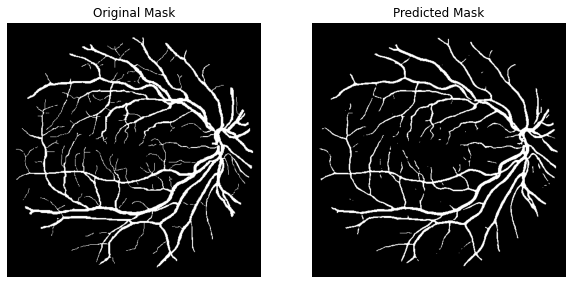

In [114]:
image = test_imgs[1]
mask = test_masks[1]
image = np.expand_dims(image, axis=0)
pred_mask = model4.predict(image)
pred_mask = (pred_mask > 0.5).astype('int32')
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.title('Original Mask')
plt.imshow(mask, cmap='gray')
plt.axis('off')
plt.subplot(122)
plt.title('Predicted Mask')
plt.imshow(pred_mask[0], cmap='gray')
plt.axis('off')